In [40]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [41]:
from keras import backend as K

print(K.backend())

tensorflow


In [42]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Add model target labels to a list
targets = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [43]:
# Create the model
inputs = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

In [44]:
model.summary()


Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
batch_size = 4
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.4525 - loss: 1.5246 - val_accuracy: 0.5682 - val_loss: 1.2390
Epoch 2/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.5464 - loss: 1.2841 - val_accuracy: 0.6282 - val_loss: 1.0878
Epoch 3/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.5805 - loss: 1.1995 - val_accuracy: 0.6360 - val_loss: 1.0328
Epoch 4/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.6028 - loss: 1.1408 - val_accuracy: 0.6230 - val_loss: 1.1468
Epoch 5/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.6167 - loss: 1.1099 - val_accuracy: 0.6742 - val_loss: 0.9531


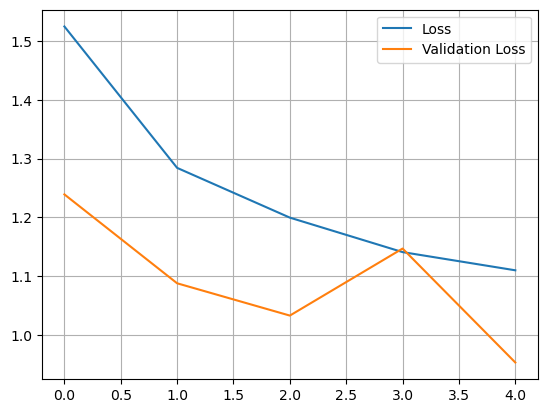

In [46]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [47]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

print("Final validation accuracy:", history.history['val_accuracy'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

Test loss: 0.9777178764343262
Test accuracy: 0.663100004196167
Final training accuracy: 0.6166889071464539
Final training loss: 1.1098549365997314
Final validation accuracy: 0.6741999983787537
Final validation loss: 0.9530597925186157


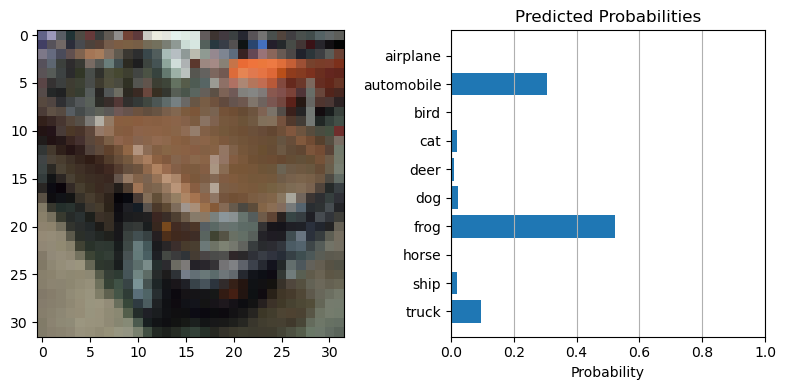

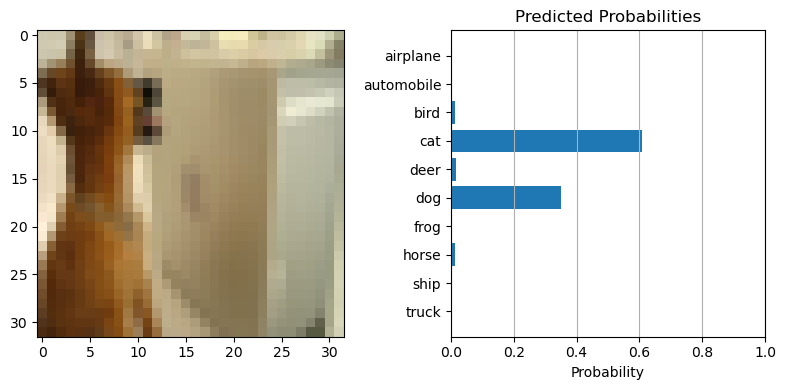

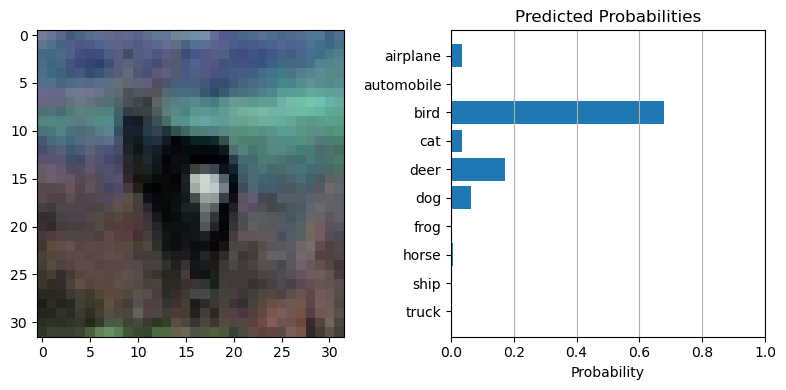

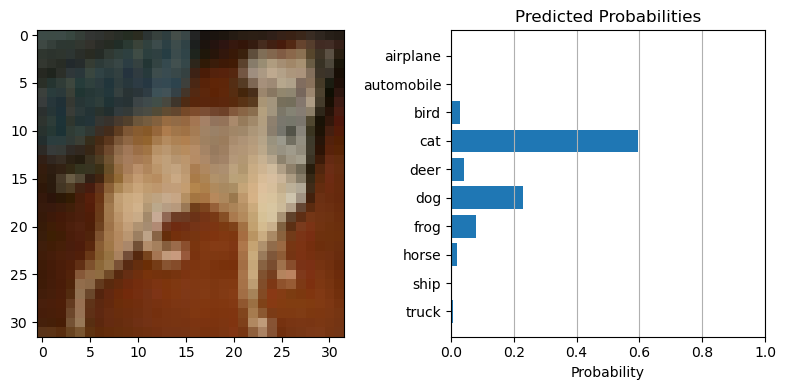

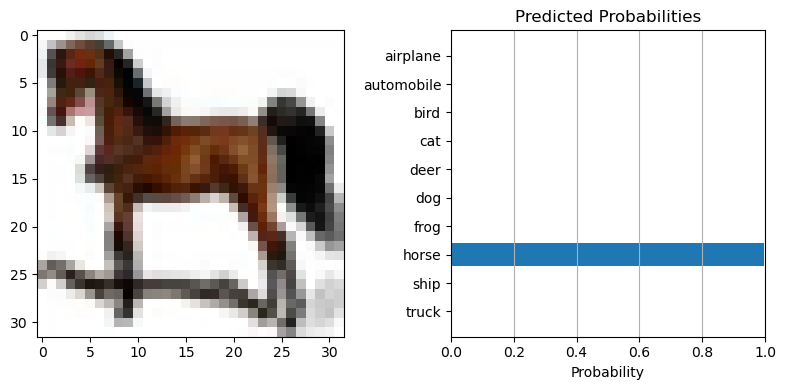

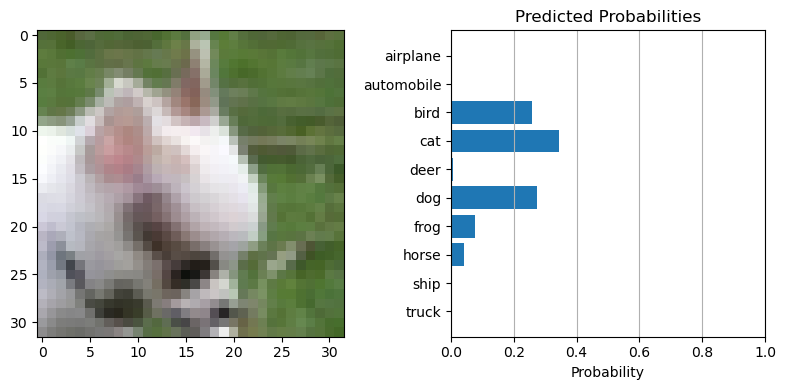

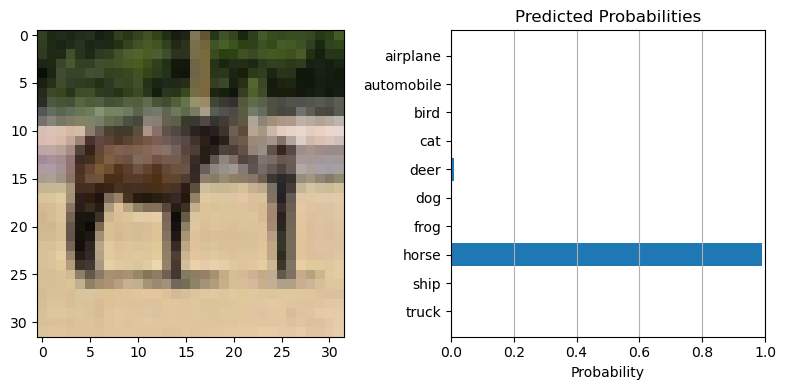

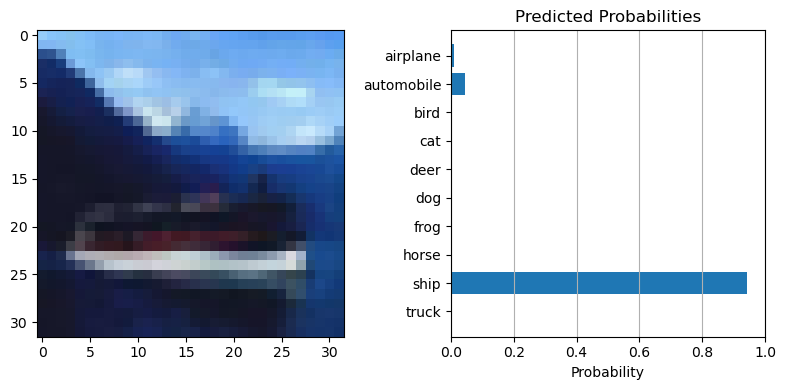

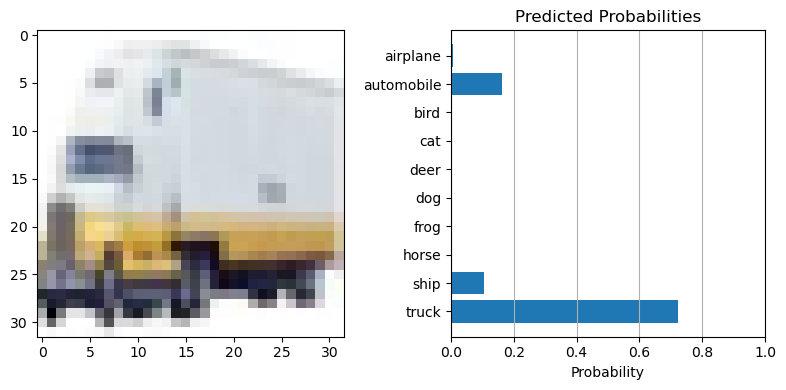

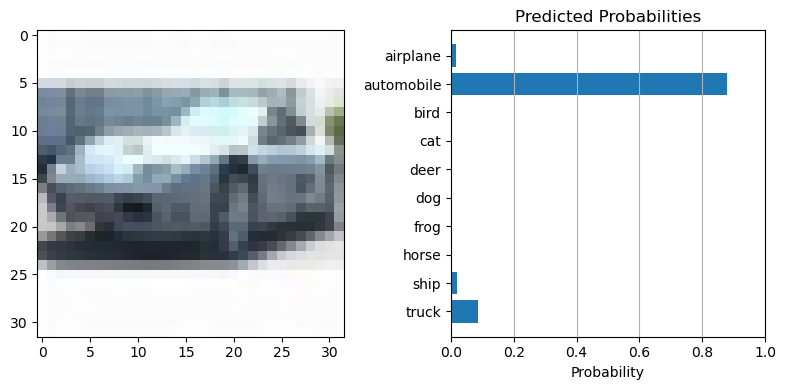

In [48]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 4))  # Increased figure height for better horizontal plot
    plt.subplot(1, 2, 1)
    plt.imshow(x[start + k].reshape((32, 32, 3)))
    ind = np.arange(0, 10)
    plt.subplot(1, 2, 2)
    plt.barh(ind, y[start + k].numpy().flatten())  # Use barh for horizontal bars
    plt.yticks(ind, targets)  # Use yticks for vertical labels
    plt.gca().invert_yaxis()  # Invert y-axis to have class 0 at the top
    plt.xlabel("Probability")  # Label the x-axis as probability
    plt.title("Predicted Probabilities")  # Add a title to the bar plot
    plt.xlim(0, 1)  # Set x-axis limit from 0 to 1 for probabilities
    plt.grid(axis='x')  # Add grid lines for the x-axis
    plt.tight_layout()  # Adjust layout to prevent labels overlapping
    plt.show()

# Modifying the model
---
Here we start to tinker with the parameters of the model, testing adding layers, optimizers and callbacks.





In [98]:
print(K.backend())

tensorflow


In [142]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Add model target labels to a list
targets = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [177]:
# Create the model
inputs = keras.Input(shape=input_shape)

x = keras.layers.Conv2D(32, kernel_size=(3, 3), use_bias=False, padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.Conv2D(32, kernel_size=(3, 3), use_bias=False, padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)



x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.3)(x)

x = keras.layers.Conv2D(64, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.Conv2D(64, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Conv2D(128, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)


x = keras.layers.Conv2D(128, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5)(x)

x = layers.Flatten()(x)

x = keras.layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = keras.layers.Dropout(0.5)(x)




outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")


In [178]:
model.summary()


Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_115         │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_77 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_76 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 16, 16, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_116         │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_78 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 16, 16, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_117         │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_79 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 8, 8, 128)      │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_118         │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_80 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 8, 8, 128)      │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_119         │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_81 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 543,082 (2.07 MB)

 Trainable params: 541,994 (2.07 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [179]:

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.src.callbacks import ReduceLROnPlateau

# increased batch size and epochs to make processing faster and more reliable
batch_size = 128
epochs = 250

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=1e-6, verbose=1)

# increase learning rate from 0.0001
optimizer = Adam(learning_rate=0.002)
# add early stop to auto stop processing if values are not getting better
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# change validation split to 0.2 to get better results
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2,
                    callbacks=[early_stop, reduce_lr])


Epoch 1/250


I0000 00:00:1761999942.013824  289263 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_8', 300 bytes spill stores, 300 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.3910 - loss: 1.6995 - val_accuracy: 0.1766 - val_loss: 2.9178 - learning_rate: 0.0020
Epoch 2/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5357 - loss: 1.2892 - val_accuracy: 0.5106 - val_loss: 1.4033 - learning_rate: 0.0020
Epoch 3/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5914 - loss: 1.1474 - val_accuracy: 0.6150 - val_loss: 1.0560 - learning_rate: 0.0020
Epoch 4/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6291 - loss: 1.0480 - val_accuracy: 0.6329 - val_loss: 1.0251 - learning_rate: 0.0020
Epoch 5/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6547 - loss: 0.9707 - val_accuracy: 0.5331 - val_loss: 1.3782 - learning_rate: 0.0020
Epoch 6/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6762 - loss: 0.9235 - val_accuracy: 0.6406 - val_loss: 1.0232 - learning_rate: 0.0020
Epoch 7/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6930 - loss: 0.8716 - val_

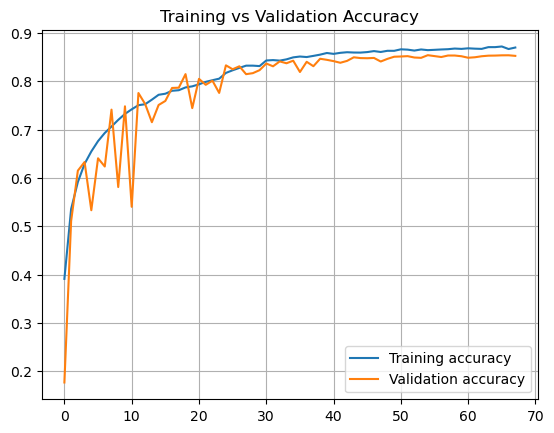

In [180]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

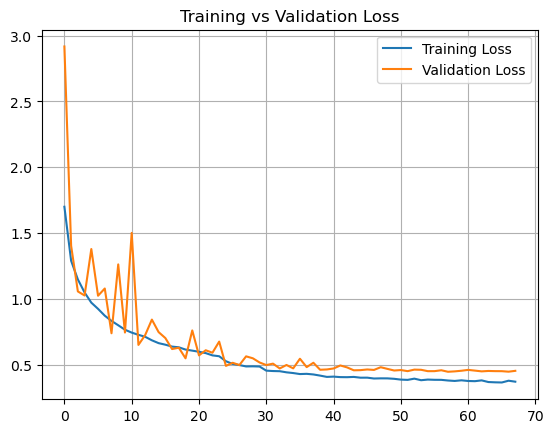

In [181]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1, len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

In [182]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

print("Final validation accuracy:", history.history['val_accuracy'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

Test loss: 0.4676865339279175
Test accuracy: 0.8471999764442444
Final training accuracy: 0.8698499798774719
Final training loss: 0.36992233991622925
Final validation accuracy: 0.8525999784469604
Final validation loss: 0.45240548253059387


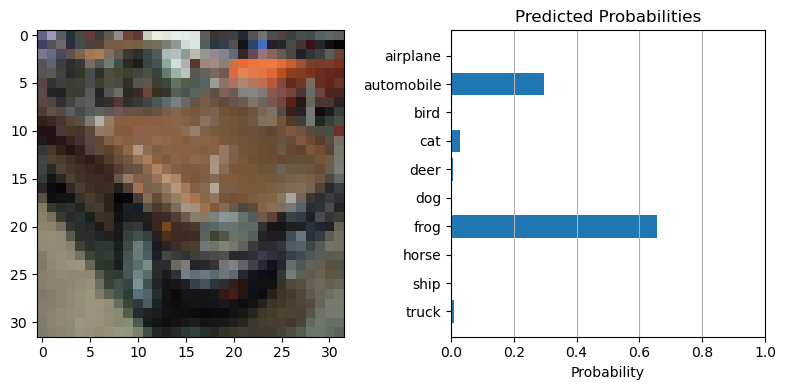

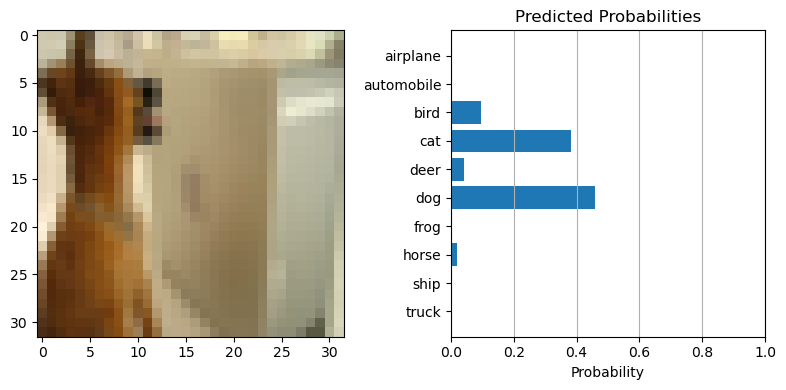

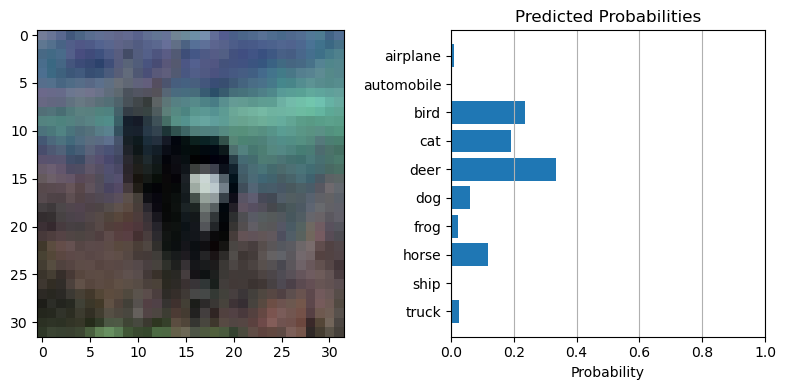

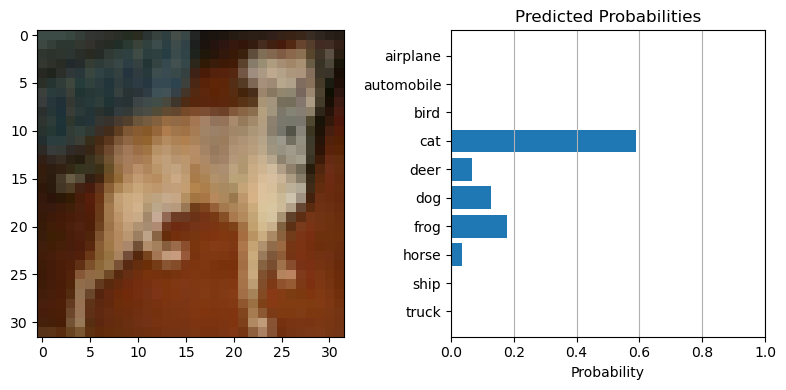

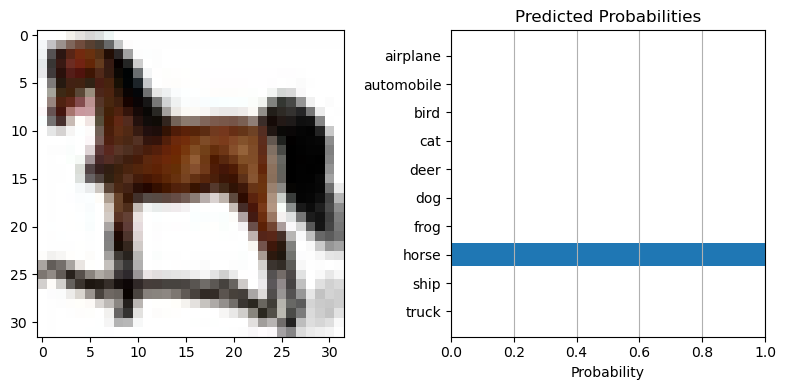

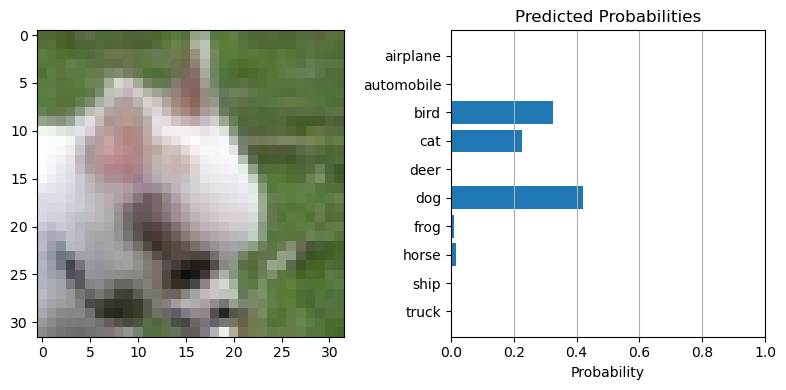

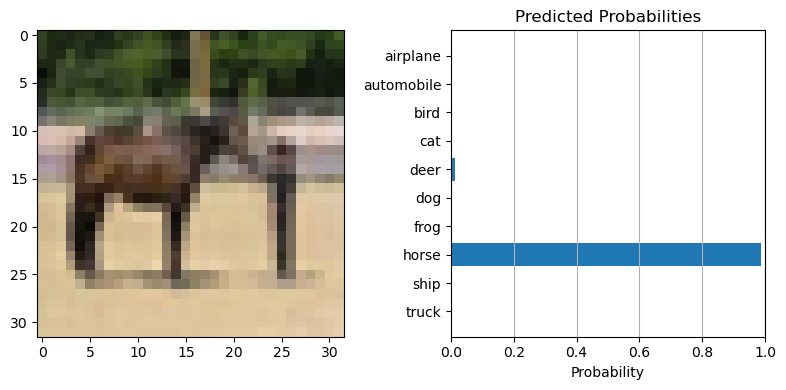

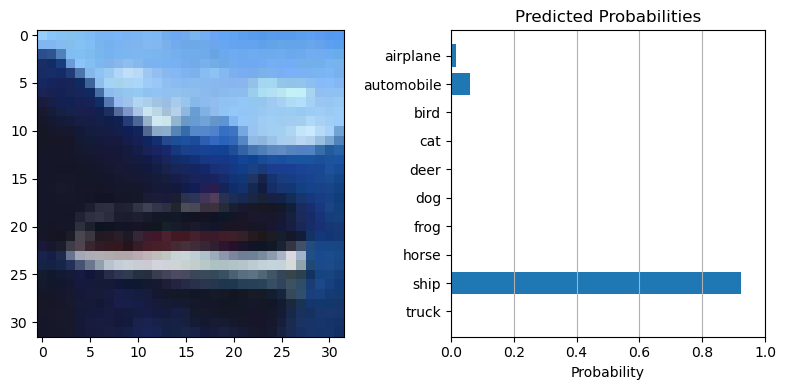

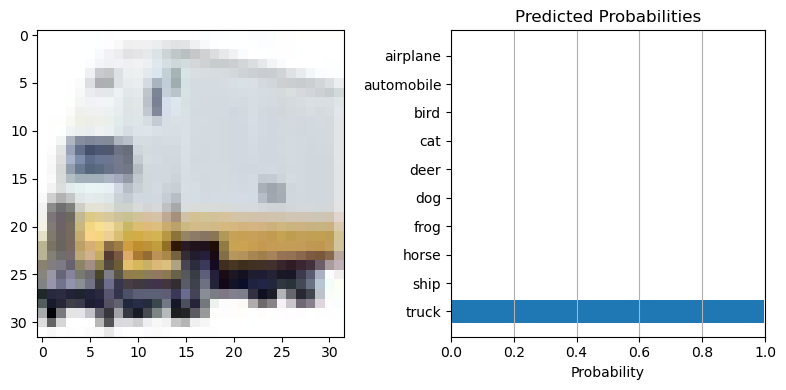

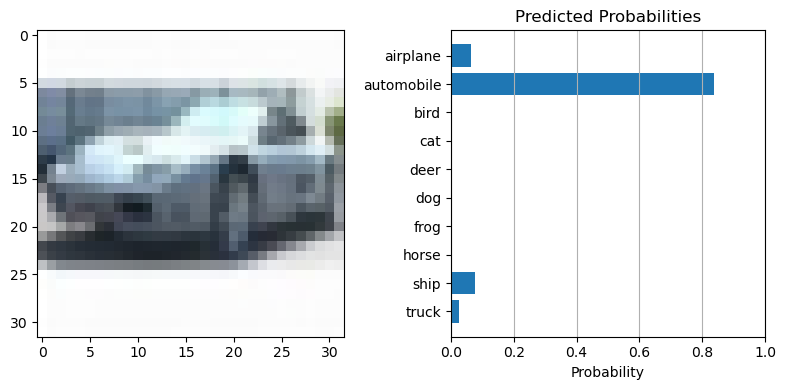

In [33]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 4))  # Increased figure height for better horizontal plot
    plt.subplot(1, 2, 1)
    plt.imshow(x[start + k].reshape((32, 32, 3)))
    ind = np.arange(0, 10)
    plt.subplot(1, 2, 2)
    plt.barh(ind, y[start + k].numpy().flatten())  # Use barh for horizontal bars
    plt.yticks(ind, targets)  # Use yticks for vertical labels
    plt.gca().invert_yaxis()  # Invert y-axis to have class 0 at the top
    plt.xlabel("Probability")  # Label the x-axis as probability
    plt.title("Predicted Probabilities")  # Add a title to the bar plot
    plt.xlim(0, 1)  # Set x-axis limit from 0 to 1 for probabilities
    plt.grid(axis='x')  # Add grid lines for the x-axis
    plt.tight_layout()  # Adjust layout to prevent labels overlapping
    plt.show()

In [21]:
model.save('./mnist_cnn.keras')


In [22]:
model = keras.models.load_model('mnist_cnn.keras')
